In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import cv2
import re
from google.colab.patches import cv2_imshow
import gc

# xml
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import ElementTree, Element, SubElement, tostring
from xml.dom import minidom

In [3]:
sample_rate = 8000  # 샘플링 레이트 (or 16000)
n_mels = 64  # 멜 필터뱅크의 수
nfft = 512  # FFT 윈도우 크기
hop_length = nfft // 2  # 프레임 사이의 샘플 수
fmax = 2500  # 최대 주파수

# sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=fmax

In [4]:
# 경로 설정
wav_7sec = '/content/drive/MyDrive/data/baseline1/processed_audio_files_7sec_8000/' # data_folder
raw_database = '/content/drive/MyDrive/data/ICBHI_final_database/' # label_folder
save_path_boxed = '/content/drive/MyDrive/data/baseline1/label_data/boxed_image/' # save_path

## 배경없는 박스 이미지 출력, 저장(savefig)

- 호흡 주기로 자르고 7초로 zeropadding한 오디오 파일들이 저장된 "디렉토리"를 받음.
- 그 안의 웨이브 파일 이름을 하나씩 받아서
    - 전체 파일 경로 설정
    - 정규식으로 파일의 맨 뒤 숫자(한 데이터의 호흡주기 순서)를 wav_number에 저장
    - check_for_text_file로 원본 wav파일에 해당하는 annotation txt파일 경로를 가져옴(raw_database)
    - 그 annotation 파일을 dataframe으로 읽어서,
        - 해당 주기에 해당하는 label정보(0, 1)를 변수에 전달

### txt 경로 반환 함수

In [5]:
# 대응되는 텍스트 파일이 없는 경우를 체크, 해당 텍스트 파일을 raw database에서 load하는 함수
def check_for_text_file(wav_filename, raw_database):
    '''
    wav_filename: os.listdir(zero_padded_7sec_wav)
    return:
        os.path.exists(txt_file_path) :
        txt_file_path
    '''
    txt_filename = re.sub(r'_\d+\.wav$', '.txt', wav_filename)  # WAV 파일 이름에서 숫자를 제외한 부분을 텍스트 파일 이름으로 사용
    txt_file_path = os.path.join(raw_database, txt_filename)
    return os.path.exists(txt_file_path), txt_file_path

In [51]:
# txtls= [file for file in os.listdir(raw_database) if file.endswith('.txt')]
# txtls

In [52]:
# 디렉토리 생성

if not os.path.exists(save_path_boxed):
    os.makedirs(save_path_boxed)

### 박스이미지 저장

idx: 0 / 6898


<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-5

idx: 200 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 400 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 600 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0,

idx: 800 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 1000 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 1200 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 1400 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 1600 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 1800 / 6898


<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0,

idx: 2000 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 2200 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 2400 / 6898


<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-5

idx: 2600 / 6898


<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0,

idx: 2800 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 3000 / 6898


<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0,

idx: 3200 / 6898


<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-5

idx: 3400 / 6898


<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-5

idx: 3600 / 6898


<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0,

idx: 3800 / 6898


<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0,

idx: 4000 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 4200 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 4400 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 4600 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 4800 / 6898


<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0,

idx: 5000 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 5200 / 6898


<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-5

idx: 5400 / 6898


<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-5

idx: 5600 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 5800 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 6000 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 6200 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 6400 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

idx: 6600 / 6898


<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0,

idx: 6800 / 6898


<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-54-fa8eeb63ac7f>:59: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time*2, end_time*2, y

Complete!!!
Complete!!!
Complete!!!
Complete!!!
Complete!!!
Complete!!!
Complete!!!
Complete!!!
Complete!!!
Complete!!!

idx: 6897 / 6898


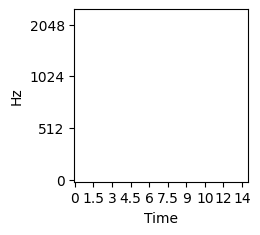

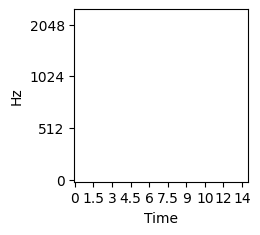

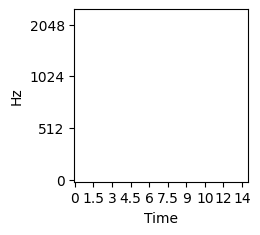

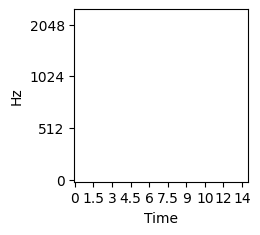

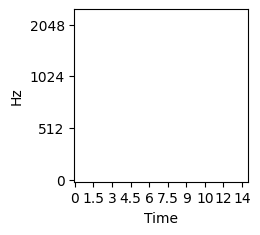

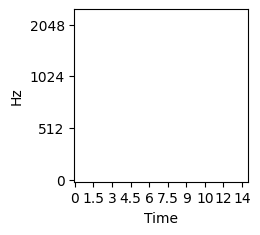

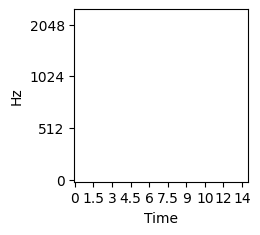

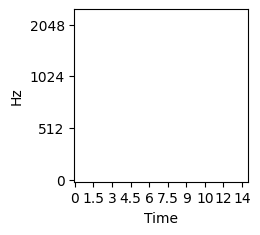

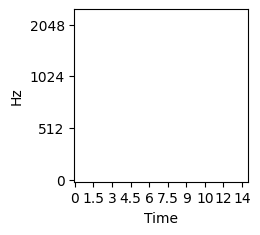

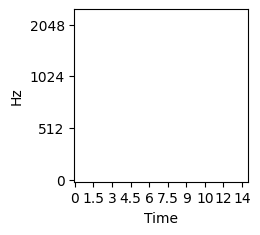

In [54]:
for idx, wav_filename in enumerate(sorted(os.listdir(wav_7sec))):
    #break # 안전장치 ㅎ
    # WAV 파일 경로
    wav_file_path = os.path.join(wav_7sec, wav_filename)
    # WAV 파일 이름에서 뒷부분의 숫자를 추출(데이터를 호흡 주기로 나눈 숫자)
    wav_number = int(re.search(r'_(\d+)\.wav$', wav_filename).group(1))  # 파일 이름에서 숫자 추출
    # 대응하는 텍스트 파일 이름 생성 및 확인 -> 해당 오디오 파일의 텍스트 어노테이션 텍스트 파일 불러오는 함수
    _, txt_file_path = check_for_text_file(wav_filename, raw_database)

    # 텍스트 파일을 읽어옴
    label_data_list = pd.read_csv(txt_file_path, sep='\t', header=None, names=['Beginning of respiratory', 'End of respiratory','crackles','wheezes'])
    # 해당 숫자에 해당하는 crackles와 wheezes 정보 추출
    crackles = label_data_list.loc[label_data_list.index == wav_number, 'crackles'].values[0]
    wheezes = label_data_list.loc[label_data_list.index == wav_number, 'wheezes'].values[0]

    try:
        '''
        호흡주기대로 자르고 "7초"로 패딩한 오디오를 사용해야하는데,
        호흡 주기 자체가 7초가 넘어가는 경우에
        7초짜리 wav데이터에 아무 정보도 담기지 않음.
        그 정보들이 이 코드에 들어오면 오류를 일으킴(None)
        error list :
            error_crackles = ['162_1b2_Tc_mc_AKGC417L_2.wav',
                  '175_1b1_Ll_sc_Litt3200_3.wav',
                  '175_1b1_Al_sc_Litt3200_3.wav',
                  '218_1b1_Al_sc_Meditron_12.wav',
                  '218_1b1_Ar_sc_Meditron_13.wav',
                  '218_1b1_Ar_sc_Meditron_14.wav',
                  '218_1b1_Lr_sc_Meditron_10.wav']

            error_wheezes = ['175_1b1_Ll_sc_Litt3200_3.wav',
                 '175_1b1_Lr_sc_Litt3200_3.wav',
                 '175_1b1_Al_sc_Litt3200_3.wav',
                 '175_1b1_Pl_sc_Litt3200_3.wav',
                 '218_1b1_Al_sc_Meditron_12.wav',
                 '218_1b1_Ar_sc_Meditron_13.wav',
                 '218_1b1_Ar_sc_Meditron_14.wav',
                 '222_1b1_Pr_sc_Meditron_7.wav']
        '''
        # crackle이 있을 때
        if crackles:
            # 오디오 파일 로드
            y, sr = librosa.load(wav_file_path, sr=8000)
            # 0이 아닌 시작 및 종료 시간 계산 (빈 부분이 아닌 오디오 시작점, 끝점 찾아줌)
            start_index = next((i for i, val in enumerate(y) if val != 0), None)
            end_index = next((i for i, val in enumerate(reversed(y)) if val != 0), None)
            start_time = start_index / sr if start_index is not None else None
            end_time = (len(y) - end_index) / sr if end_index is not None else None

            # Mel spectrogram 계산
            S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=fmax)
            S_db = librosa.power_to_db(S, ref=np.max)
            plt.figure(figsize=(2.24, 2.24), facecolor='white')
            librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sr, fmax=fmax, cmap='Greys', alpha=0) # alpha 값 설정.

            color = 'black'
            ymin = 100/fmax
            ymax = 200/fmax # if wheeze : 1200/fmax
            plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)

            # 사각형 영역 표시
            plt.axis('off')
            plt.tight_layout()

            # 저장 경로 설정, 이미지 생성
            save_filename = os.path.splitext(wav_filename)[0] + '_crackles_boxed.png'  # WAV 파일 이름을 기반으로 이미지 파일 이름 생성
            save_file_fullpath = os.path.join(save_path_boxed, save_filename)  # 저장할 이미지의 전체 경로 설정
            plt.savefig(save_file_fullpath, bbox_inches='tight', pad_inches=0, transparent=True)
            plt.close()

        # wheeze가 있을 때
        if wheezes:
            # 오디오 파일 로드
            y, sr = librosa.load(wav_file_path, sr=8000)
            # 0이 아닌 시작 및 종료 시간 계산 (빈 부분이 아닌 오디오 시작점, 끝점 찾아줌)
            start_index = next((i for i, val in enumerate(y) if val != 0), None)
            end_index = next((i for i, val in enumerate(reversed(y)) if val != 0), None)
            start_time = start_index / sr if start_index is not None else None
            end_time = (len(y) - end_index) / sr if end_index is not None else None

            # Mel spectrogram 계산
            S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=fmax)
            S_db = librosa.power_to_db(S, ref=np.max)
            plt.figure(figsize=(2.24, 2.24), facecolor='white')
            librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sr, fmax=fmax, cmap='Greys', alpha=0) # alpha 값 설정.

            color = 'black'
            ymin = 200/fmax
            ymax = 1200/fmax

            plt.axvspan(start_time*2, end_time*2, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)

            # 사각형 영역 표시
            plt.axis('off')
            plt.tight_layout()

            # 저장 경로 설정, 이미지 생성
            save_filename = os.path.splitext(wav_filename)[0] + '_wheezes_boxed.png'  # WAV 파일 이름을 기반으로 이미지 파일 이름 생성
            save_file_fullpath = os.path.join(save_path_boxed, save_filename)  # 저장할 이미지의 전체 경로 설정
            plt.savefig(save_file_fullpath, bbox_inches='tight', pad_inches=0, transparent=True)
            plt.close()
    except: pass

    if idx % 200 == 0:
        gc.collect()
        print('idx:', idx, '/ 6898')

print('Complete!!!\n'*10)
print('idx:', idx, '/ 6898')

In [6]:
# 결과 확인
len(os.listdir('/content/drive/MyDrive/data/baseline1/label_data/boxed_image')) # (3747: 오류값 외) (3762: 오류값 포함) (3733: 잘못집어넣어서 생긴..)

3747

## train이미지 저장

In [18]:
error_crackles = ['162_1b2_Tc_mc_AKGC417L_2.wav',
                  '175_1b1_Ll_sc_Litt3200_3.wav',
                  '175_1b1_Al_sc_Litt3200_3.wav',
                  '218_1b1_Al_sc_Meditron_12.wav',
                  '218_1b1_Ar_sc_Meditron_13.wav',
                  '218_1b1_Ar_sc_Meditron_14.wav',
                  '218_1b1_Lr_sc_Meditron_10.wav']

error_wheezes = ['175_1b1_Ll_sc_Litt3200_3.wav',
                 '175_1b1_Lr_sc_Litt3200_3.wav',
                 '175_1b1_Al_sc_Litt3200_3.wav',
                 '175_1b1_Pl_sc_Litt3200_3.wav',
                 '218_1b1_Al_sc_Meditron_12.wav',
                 '218_1b1_Ar_sc_Meditron_13.wav',
                 '218_1b1_Ar_sc_Meditron_14.wav',
                 '222_1b1_Pr_sc_Meditron_7.wav']

save_path_train = save_path_boxed.replace('boxed_image/', 'train_image/')

In [19]:
# 경로 생성
if not os.path.exists(save_path_train):
    os.makedirs(save_path_train)

In [15]:
error_crackles

['162_1b2_Tc_mc_AKGC417L_2.wav',
 '175_1b1_Ll_sc_Litt3200_3.wav',
 '175_1b1_Al_sc_Litt3200_3.wav',
 '218_1b1_Al_sc_Meditron_12.wav',
 '218_1b1_Ar_sc_Meditron_13.wav',
 '218_1b1_Ar_sc_Meditron_14.wav',
 '218_1b1_Lr_sc_Meditron_10.wav']

In [16]:
# error file 확인
for idx, wav_filename in enumerate(sorted(os.listdir(wav_7sec))):
        if wav_filename in error_wheezes:
            print(idx,'||' ,wav_filename)


4287 || 175_1b1_Al_sc_Litt3200_3.wav
4294 || 175_1b1_Ll_sc_Litt3200_3.wav
4298 || 175_1b1_Lr_sc_Litt3200_3.wav
4302 || 175_1b1_Pl_sc_Litt3200_3.wav
6527 || 218_1b1_Al_sc_Meditron_12.wav
6543 || 218_1b1_Ar_sc_Meditron_13.wav
6544 || 218_1b1_Ar_sc_Meditron_14.wav
6775 || 222_1b1_Pr_sc_Meditron_7.wav


In [20]:
print('Start!')
for idx, wav_filename in enumerate(sorted(os.listdir(wav_7sec))):

    # WAV 파일 경로
    wav_file_path = os.path.join(wav_7sec, wav_filename)
    # WAV 파일 이름에서 뒷부분의 숫자를 추출(데이터를 호흡 주기로 나눈 숫자)
    wav_number = int(re.search(r'_(\d+)\.wav$', wav_filename).group(1))  # 파일 이름에서 숫자 추출
    # 대응하는 텍스트 파일 이름 생성 및 확인 -> 해당 오디오 파일의 텍스트 어노테이션 텍스트 파일 불러오는 함수
    _, txt_file_path = check_for_text_file(wav_filename, raw_database)

    # 텍스트 파일을 읽어옴
    label_data_list = pd.read_csv(txt_file_path, sep='\t', header=None, names=['Beginning of respiratory', 'End of respiratory','crackles','wheezes'])
    # 해당 숫자에 해당하는 crackles와 wheezes 정보 추출
    crackles = label_data_list.loc[label_data_list.index == wav_number, 'crackles'].values[0]
    wheezes = label_data_list.loc[label_data_list.index == wav_number, 'wheezes'].values[0]

    # crackles
    if crackles:
        if wav_filename not in error_crackles:
            # 오디오 파일 로드
            y, sr = librosa.load(wav_file_path, sr=8000)
            # Mel spectrogram 계산
            S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=fmax)
            S_db = librosa.power_to_db(S, ref=np.max)
            plt.figure(figsize=(2.24, 2.24))
            librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sr, fmax=fmax)

            # 사각형 영역 표시
            plt.axis('off')
            plt.tight_layout()

            # 저장 경로 설정, 이미지 생성
            save_filename = os.path.splitext(wav_filename)[0] + '_crackles.png'  # WAV 파일 이름을 기반으로 이미지 파일 이름 생성
            save_file_fullpath = os.path.join(save_path_train, save_filename)  # 저장할 이미지의 전체 경로 설정
            plt.savefig(save_file_fullpath, pad_inches=0, transparent=True)
            plt.close()

    if wheezes:
        if wav_filename not in error_wheezes:
            # 오디오 파일 로드
            y, sr = librosa.load(wav_file_path, sr=8000)
            # Mel spectrogram 계산
            S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=fmax)
            S_db = librosa.power_to_db(S, ref=np.max)
            plt.figure(figsize=(2.24, 2.24), facecolor='white')
            librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sr, fmax=fmax)

            # 사각형 영역 표시
            plt.axis('off')
            plt.tight_layout()

            # 저장 경로 설정, 이미지 생성
            save_filename = os.path.splitext(wav_filename)[0] + '_wheezes.png'  # WAV 파일 이름을 기반으로 이미지 파일 이름 생성
            save_file_fullpath = os.path.join(save_path_train, save_filename)  # 저장할 이미지의 전체 경로 설정
            plt.savefig(save_file_fullpath, pad_inches=0, transparent=True)
            plt.close()

    if idx % 200 == 0:
        gc.collect()
        print('idx:', idx, '/ 6898')

print('Complete!!!\n'*10)
print(dx+1, '/ 6898')



Start!
idx: 0 / 6898
idx: 200 / 6898
idx: 400 / 6898
idx: 600 / 6898
idx: 800 / 6898
idx: 1000 / 6898
idx: 1200 / 6898
idx: 1400 / 6898
idx: 1600 / 6898
idx: 1800 / 6898
idx: 2000 / 6898
idx: 2200 / 6898
idx: 2400 / 6898
idx: 2600 / 6898
idx: 2800 / 6898
idx: 3000 / 6898
idx: 3200 / 6898
idx: 3400 / 6898
idx: 3600 / 6898
idx: 3800 / 6898
idx: 4000 / 6898
idx: 4200 / 6898
idx: 4400 / 6898
idx: 4600 / 6898
idx: 4800 / 6898
idx: 5000 / 6898
idx: 5200 / 6898
idx: 5400 / 6898
idx: 5600 / 6898
idx: 5800 / 6898
idx: 6000 / 6898
idx: 6200 / 6898
idx: 6400 / 6898
idx: 6600 / 6898
idx: 6800 / 6898
Complete!!!
Complete!!!
Complete!!!
Complete!!!
Complete!!!
Complete!!!
Complete!!!
Complete!!!
Complete!!!
Complete!!!

idx: 6897 / 6898


In [21]:
train_len = [f for f in os.listdir(save_path_train) if f.endswith('.png')]
print(len(train_len)) #3747

3747


## XML 파일 생성

### xml function

In [40]:

def create_xml(image_path, bboxes, class_labels, xml_directory):

    # Parse 파일 이름 및 경로
    image_filename = os.path.basename(image_path)
    image_dirname = os.path.dirname(image_path)

    # XML 파일 경로 설정 + xml저장 이름 설정
    xml_filename = os.path.join(xml_directory, os.path.splitext(image_filename)[0].replace('_boxed.png', '') + '.xml')
    # XML 루트 요소 생성
    root = Element("annotation")
    # folder 요소 추가
    folder = SubElement(root, "folder")
    folder.text = os.path.basename(image_dirname)

    # filename 요소 추가 ***
    filename = SubElement(root, "filename")
    filename.text = image_filename.replace('_boxed', '')

    # path 요소 추가 ***
    path = SubElement(root, "path")
    path.text = image_path

    # source 요소 추가
    source = SubElement(root, "source")
    database = SubElement(source, "database")
    database.text = "Unknown"
    # size 요소 추가
    size = SubElement(root, "size")
    #print('image_path:', image_path)
    img = cv2.imread(image_path)
    #print('img: ', img)
    height, width, depth = img.shape
    width_elem = SubElement(size, "width")
    width_elem.text = str(width)
    height_elem = SubElement(size, "height")
    height_elem.text = str(height)
    depth_elem = SubElement(size, "depth")
    depth_elem.text = str(depth)
    # segmented 요소 추가
    segmented = SubElement(root, "segmented")
    segmented.text = "0"

    # 객체 정보 추가 ===========================================================

    for bbox, label in zip(bboxes, class_labels):

        object_elem = SubElement(root, "object")
        name_elem = SubElement(object_elem, "name")
        name_elem.text = label
        pose_elem = SubElement(object_elem, "pose")
        pose_elem.text = "Unspecified"
        truncated_elem = SubElement(object_elem, "truncated")
        truncated_elem.text = "0"
        difficult_elem = SubElement(object_elem, "difficult")
        difficult_elem.text = "0"

        bndbox_elem = SubElement(object_elem, "bndbox")
        xmin_elem = SubElement(bndbox_elem, "xmin")
        xmin_elem.text = str(bbox[0][0])
        ymin_elem = SubElement(bndbox_elem, "ymin")
        ymin_elem.text = str(bbox[0][1])
        xmax_elem = SubElement(bndbox_elem, "xmax")
        xmax_elem.text = str(bbox[1][0])
        ymax_elem = SubElement(bndbox_elem, "ymax")
        ymax_elem.text = str(bbox[1][1])

    # XML 파일 저장
    xml_str = minidom.parseString(tostring(root)).toprettyxml(indent="    ")
    xml_filename = xml_filename.replace('_boxed','')
    with open(xml_filename, "w") as xml_file:
        xml_file.write(xml_str)


### save xml

In [36]:
# box친 파일이 있는 경로
'''save_path_boxed'''
# XML 파일을 저장할 디렉토리 경로 설정
xml_directory = save_path_boxed.replace('boxed_image/', 'xml_file/')

# 디렉토리가 없으면 생성합니다.
if not os.path.exists(xml_directory):
    os.makedirs(xml_directory)

In [37]:
# 이미지 파일 목록을 가져옴
image_files_crackles = [f for f in os.listdir(save_path_boxed) if f.endswith('_crackles_boxed.png')]
image_files_wheezes = [f for f in os.listdir(save_path_boxed) if f.endswith('_wheezes_boxed.png')]
print(len(image_files_crackles))
print(len(image_files_wheezes))

# 레이블 변수 지정
class_labels_crackles = ['crackles']
class_labels_wheezes = ['wheezes']

2363
1384


### 적용: xml <- crackles

In [52]:
# crackles

for idx, filename in enumerate(image_files_crackles): # or wheezes

    # 각 이미지 파일 경로 -> 하나의 이미지 파일 불러와서, 엣지를 구하고 컨투어 검출, 있으면 -> 사각형을 그려서 그
    filepath = os.path.join(save_path_boxed, filename)
    # 이미지 불러오기
    image = cv2.imread(filepath)
    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Canny Edge Detection 적용
    edges = cv2.Canny(gray, 700, 800, apertureSize=7)
    # Contour 검출
    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Contour가 존재하는 경우에만 사각형을 그리도록 함
    if len(contours) > 0:
        # 각 Contour에 대해 검출된 네모의 좌표를 출력하고 사각형 그리기
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
        # 클래스 레이블 및 바운딩 박스 설정
        bboxes = [[(x, y), (x+w, y+h)]]

        # XML 파일 작성
        create_xml(filepath, bboxes, class_labels_crackles, xml_directory)  # XML 파일 작성 코드 적용

    if idx % 200 == 0: print('idx: ', idx, '/ 2363' )
print(idx+1, '/ 2363', '\n', 'Complete!\n'*10)

idx:  0 / 2363
idx:  200 / 2363
idx:  400 / 2363
idx:  600 / 2363
idx:  800 / 2363
idx:  1000 / 2363
idx:  1200 / 2363
idx:  1400 / 2363
idx:  1600 / 2363
idx:  1800 / 2363
idx:  2000 / 2363
idx:  2200 / 2363
2363 / 2363
 Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!



### 적용: xml <- wheezes

In [54]:
# wheezes
for idx, filename in enumerate(image_files_wheezes): # or wheezes
    # 각 이미지 파일 경로 -> 하나의 이미지 파일 불러와서, 엣지를 구하고 컨투어 검출, 있으면 -> 사각형을 그려서 그
    filepath = os.path.join(save_path_boxed, filename)
    # 이미지 불러오기
    image = cv2.imread(filepath)
    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Canny Edge Detection 적용
    edges = cv2.Canny(gray, 700, 800, apertureSize=7)
    # Contour 검출
    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Contour가 존재하는 경우에만 사각형을 그리도록 함
    if len(contours) > 0:
        # 각 Contour에 대해 검출된 네모의 좌표를 출력하고 사각형 그리기
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
        # 클래스 레이블 및 바운딩 박스 설정
        bboxes = [[(x, y), (x+w, y+h)]]

        # XML 파일 작성
        create_xml(filepath, bboxes, class_labels_wheezes, xml_directory)  # XML 파일 작성 코드 적용

    if idx % 200 == 0: print('idx: ', idx, '/ 1384' )
print(idx+1, '/ 1384', '\n', 'Complete!\n'*10)

idx:  0 / 1384
idx:  200 / 1384
idx:  400 / 1384
idx:  600 / 1384
idx:  800 / 1384
idx:  1000 / 1384
idx:  1200 / 1384
1384 / 1384
 Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!



In [55]:
# 결과 확인
xml_files_crackles = [f for f in os.listdir('/content/drive/MyDrive/data/baseline1/label_data/xml_file/') if f.endswith('_crackles.xml')]
print('crackles: ', len(xml_files_crackles)) # 2363
xml_files_wheezes = [f for f in os.listdir('/content/drive/MyDrive/data/baseline1/label_data/xml_file/') if f.endswith('_wheezes.xml')]
print('wheezes: ', len(xml_files_wheezes)) # 1384
xml_files = [f for f in os.listdir('/content/drive/MyDrive/data/baseline1/label_data/xml_file/') if f.endswith('.xml')]
print('total: ', len(xml_files)) # 3747

crackles:  2363
wheezes:  1384
total:  3747


In [56]:
gc.collect()
print("Done!!")

Done!!
